# **Exploratory Data Analysis (EDA) - Hotel Booking Demand**
Link Dataset : https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand
* Jumlah Data : 119.390 baris
* Jumlah Kolom : 32 kolom

berisi data pemesanan (historis) untuk :
1. tipe hotel (City Hotel atau Resort Hotel)
2. waktu pemesanan (lead time)
3. lama menginap
4. jumlah tamu
5. data demografis
(negara)
6. tipe pelanggan
7. harga kamar (ADR)
8. apakah pemesanan tersebut dibatalkan `is_canceled` = 1 atau `is_canceled` = 0
9. etc.


# IMPORT LIBRARIES DAN DATASET

##

* pandas (pd) : u/ memanipulasi data (DataFrame)
* numpy (np) : u/ operasi numerik
* matplotlib.pyplot (plt) : u/ membuat plot dasar
* seaborn (sns) : u/ membuat visualisasi data
* missingno (msno) : u/ memvisualisasikan data hilang (*missing values*)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# set default u/ visualisasi
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

data_u = "/content/hotel_bookings.csv"
df = pd.read_csv(data_u)

print(f"Dataset berhasil dimuat. Jumlah baris: {df.shape[0]}, Jumlah kolom: {df.shape[1]}")
# print(df.head())
display(df.head())

Dataset berhasil dimuat. Jumlah baris: 119390, Jumlah kolom: 32


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


#INFORMASI TIPE DATA

`df.info()` digunakan u/ memberikan ringkasan teknis dari DataFrame seperti :
1. Jumlah total baris (entries)
2. Nama setiap column
3. Jumlah nilai non-null (tidak kosong) di setiap kolom
4. Tipe data (Dtype) dari setiap kolom (misal: int64, object, float64)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 119210 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  float64
 11  babies                          119210 non-null  int64  
 12  meal                 

None

# DESCRIBE STATISTIK

`df.describe()` digunakan u/ menghasilkan statistik deskriptif untuk semua kolom numerik/angka. Ini mencakup :
1. count : Jumlah data
2. mean : Rata-rata
3. std : Standar deviasi
4. min : Nilai minimum
5. 25% (Q1) : Kuartil pertama
6. 50% (Q2) : Median
7. 75% (Q3) : Kuartil ketiga
8. max : Nilai maksimum

In [ ]:
# print(df.describe())
display(df.describe())

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,0.370766,104.109227,2016.156472,27.163376,15.798717,0.927053,2.499195,1.859206,0.104043,0.007961,0.031499,0.087191,0.137094,0.218799,74.889078,2.321215,101.969092,0.062553,0.571504
std,0.483012,106.875450,0.707485,13.601107,8.781070,0.995117,1.897106,0.575186,0.398836,0.097509,0.174663,0.844918,1.498137,0.638504,107.168884,17.598002,50.434007,0.245360,0.792876
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,69.500000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,94.950000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


# CEK MISSING VALUES

Sel ini menghitung jumlah nilai 'null' (kosong/NaN) u/ setiap kolom.
`df.isnull()` membuat DataFrame berisi True/False.
`.sum()` menjumlahkan semua nilai 'True' (yang dihitung sebagai 1).
`.sort_values(ascending=False)` mengurutkan hasilnya dari yang terbanyak agar kita tahu kolom mana yang paling bermasalah

In [ ]:
print(df.isnull().sum().sort_values(ascending=False))

company                           112593
agent                              16340
country                              488
children                               4
arrival_date_month                     0
arrival_date_week_number               0
hotel                                  0
is_canceled                            0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
adults                                 0
stays_in_week_nights                   0
babies                                 0
meal                                   0
lead_time                              0
arrival_date_year                      0
distribution_channel                   0
market_segment                         0
previous_bookings_not_canceled         0
is_repeated_guest                      0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
previous_cancellations                 0
deposit_type    

# VISUALISASI MISSING VALUES

Sel ini menggunakan library 'missingno' u/ membuat plot matriks dari data yang hilang.
`msno.matrix(df)` membuat visualisasi di mana setiap baris putih menunjukkan data yang hilang dan melihatnya di `company`

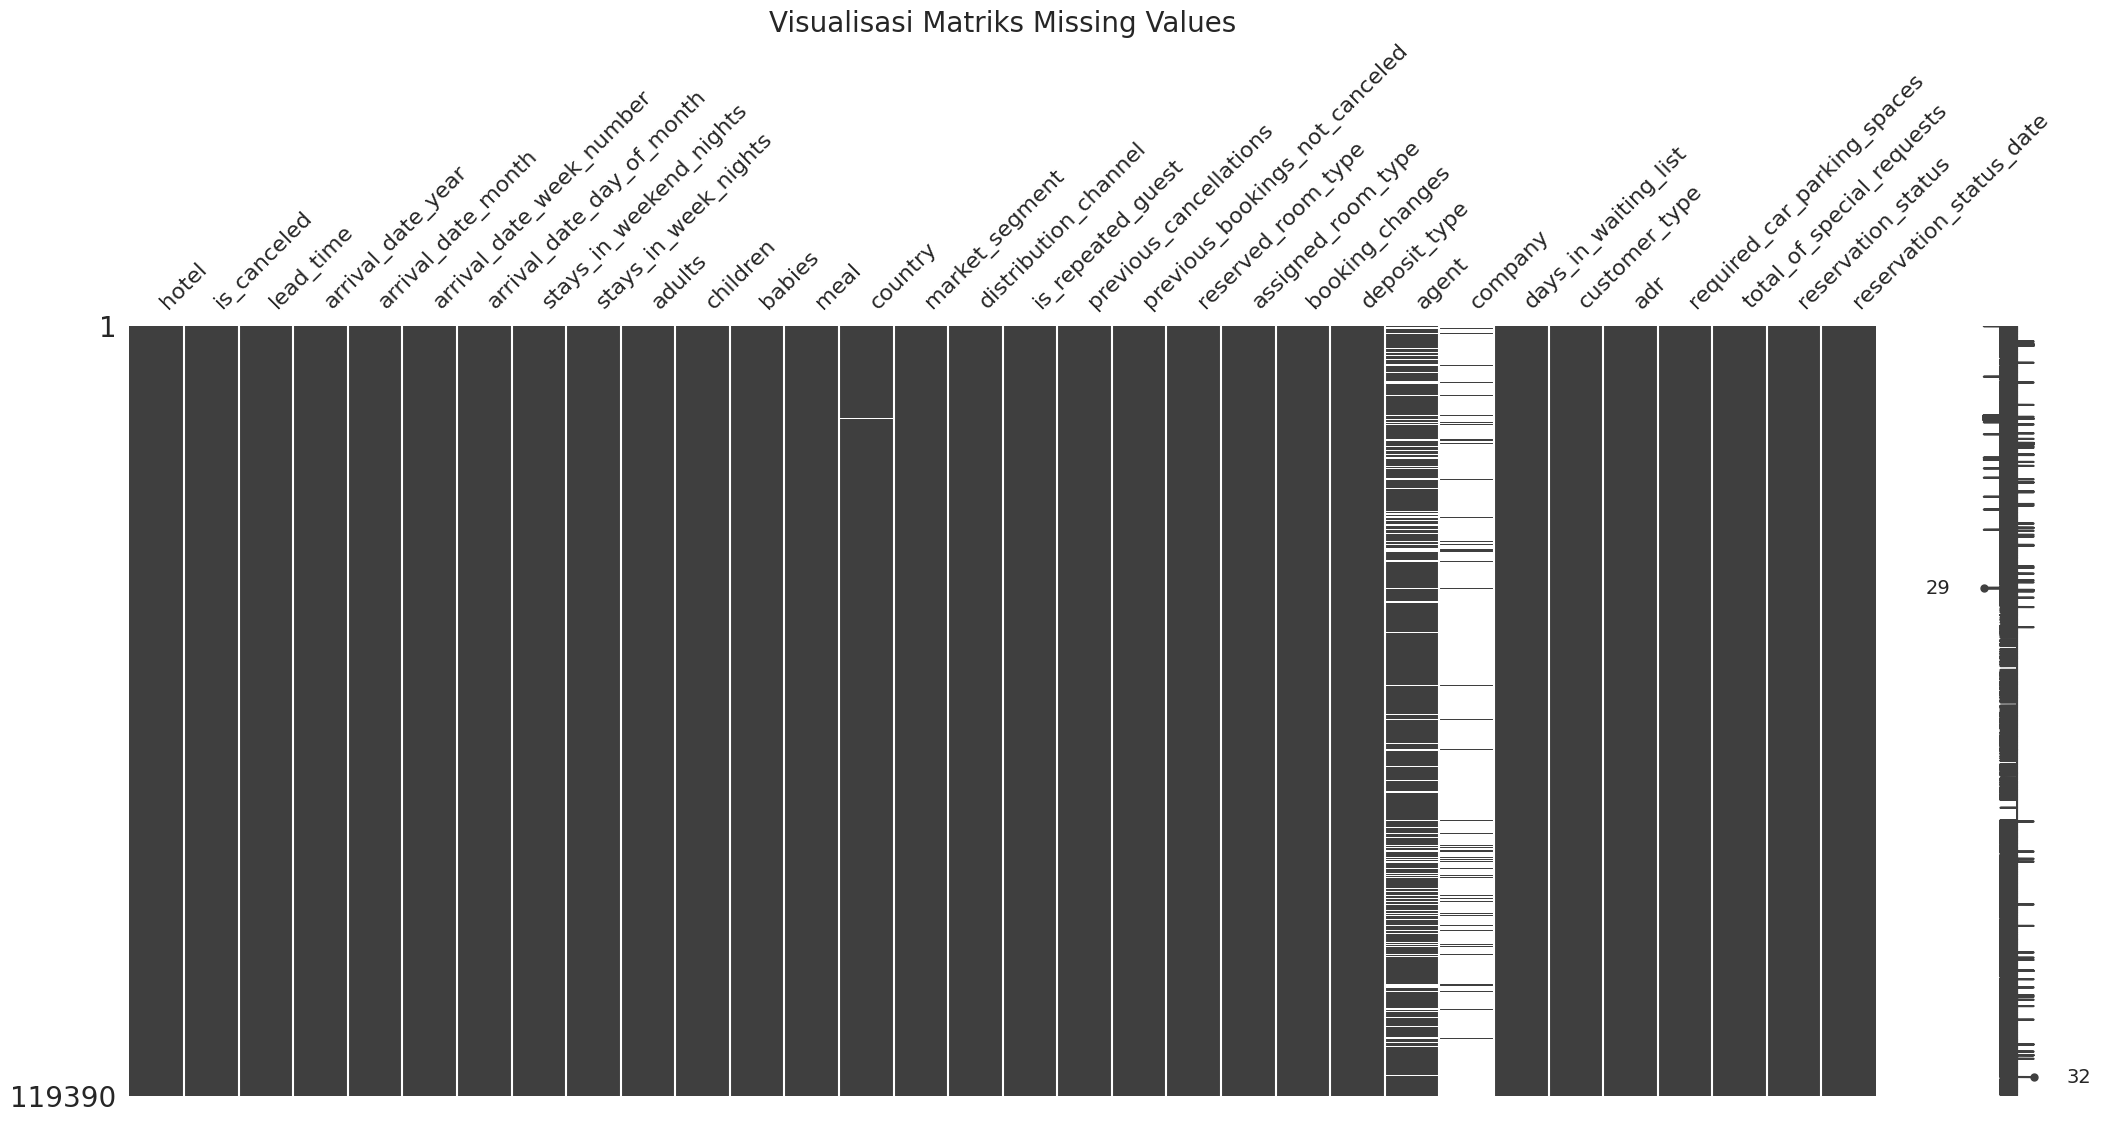

In [ ]:
msno.matrix(df)
plt.title('Visualisasi Matriks Missing Values', fontsize=20)
plt.show()

# DATA CLEANSING

## MISSING VALUES

Berdasarkan pada sel missing values, kita membersihkan data :
1. `country` (sedikit null) : Diisi dengan modus
2. `children` (sedikit null) : Diisi dengan 0 (asumsi paling logis)
3. `company` (banyak null) : Dihapus (`drop`) karena terlalu banyak yang kosong
4. `agent` (cukup banyak null) : Diisi dengan 0
`inplace=True` berarti kita memodifikasi DataFrame 'df' secara langsung

In [ ]:
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['children'].fillna(0, inplace=True)
df.drop('company', axis=1, inplace=True)
df['agent'].fillna(0, inplace=True)

print("--- Missing Values SETELAH Cleaning ---")
print(df.isnull().sum())

/tmp/ipython-input-2677262563.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna(df['country'].mode()[0], inplace=True)
/tmp/ipython-input-2677262563.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

--- Missing Values SETELAH Cleaning ---
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                     

## DATA TIDAK KONSISTEN

Ex : Pemesanan hotel tetapi jumlah total tamu (dewasa + anak + bayi) adalah 0
1. hitung total tamu
2. cari baris di mana total tamu adalah 0
3. hapus baris-baris tersebut dari DataFrame 'df' karena data ini tidak valid untuk analisis

In [ ]:
total_guests = df['adults'] + df['children'] + df['babies']
print(f"\nJumlah pemesanan dengan 0 tamu: {df[total_guests == 0].shape[0]}")

df = df[total_guests > 0]
print(f"Jumlah baris setelah menghapus data 0 tamu: {df.shape[0]}")


Jumlah pemesanan dengan 0 tamu: 180
Jumlah baris setelah menghapus data 0 tamu: 119210


# ANALISIS UNIVARIAT

Kita akan menganalisis satu persatu variabel

## STATUS PEMBATALAN

Kita mulai dengan variabel target kita : `is_canceled`
\
`sns.countplot()` adalah plot batang (bar plot) yang menghitung jumlah kemunculan setiap kategori (0 = Tidak Batal, 1 = Batal)
`value_counts(normalize=True)` menunjukkan persentasenya

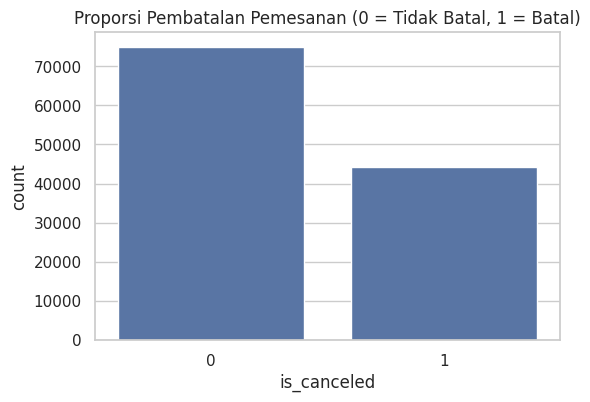

Persentase Pembatalan:
is_canceled
0    0.629234
1    0.370766
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='is_canceled', data=df)
plt.title('Proporsi Pembatalan Pemesanan (0 = Tidak Batal, 1 = Batal)')
plt.show()

print("Persentase Pembatalan:")
print(df['is_canceled'].value_counts(normalize=True))

## TIPE HOTEL

Kita menggunakan `countplot` lagi u/ melihat proporsi pemesanan antara 'City Hotel' dan 'Resort Hotel'. Ini membantu kita memahami komposisi dataset kita.

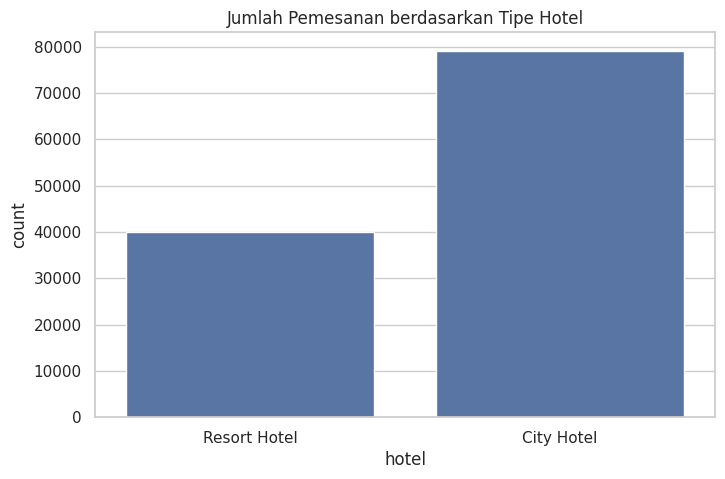

Persentase Tipe Hotel:
hotel
City Hotel      0.664063
Resort Hotel    0.335937
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='hotel', data=df)
plt.title('Jumlah Pemesanan berdasarkan Tipe Hotel')
plt.show()

print("Persentase Tipe Hotel:")
print(df['hotel'].value_counts(normalize=True))

## BULAN KEDATANGAN

Analisis ini u/ melihat tren musiman (seasonality). Kita plot jumlah pemesanan (`countplot`) berdasarkan `arrival_date_month`.
Kita gunakan `order=[...]` u/ memastikan bulan-bulannya terurut dengan benar (Jan, Feb, Mar, ...).

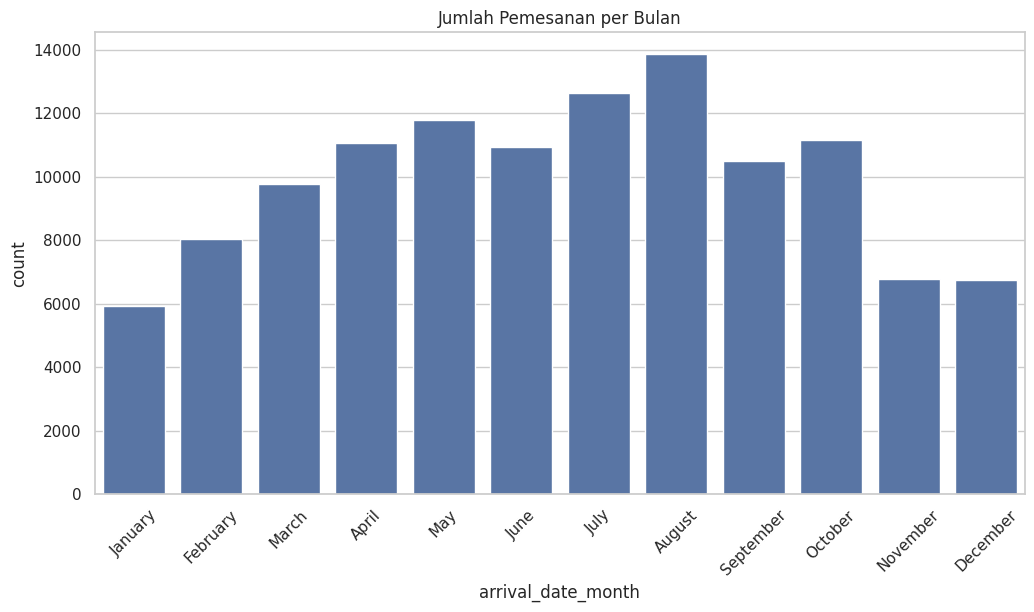

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='arrival_date_month', data=df,
              order=['January', 'February', 'March', 'April', 'May', 'June',
                     'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Jumlah Pemesanan per Bulan')
plt.xticks(rotation=45) # Memutar label X agar tidak tumpang tindih
plt.show()

## LEAD TIME

`lead_time` adalah variabel numerik (waktu tunggu), dan u/ data numerik, kita gunakan `histplot` (histogram). Kemudian u/ melihat distribusinya, menggunakan
`kde=True` menambahkan garis kurva estimasi densitas. Plot ini menunjukkan bahwa kebanyakan pemesanan dilakukan dekat dengan tanggal kedatangan

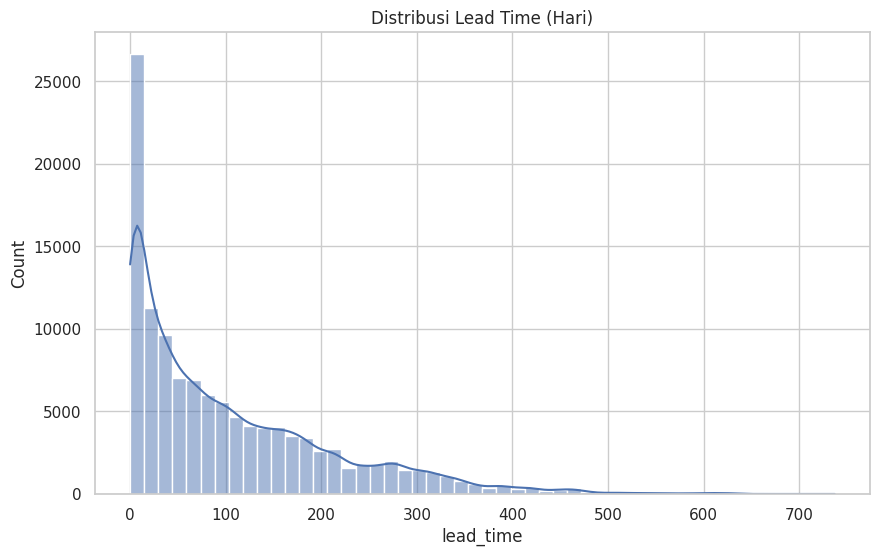

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['lead_time'], kde=True, bins=50)
plt.title('Distribusi Lead Time (Hari)')
plt.show()

# ANALISIS BIVARIAT

Disini kita akan menganalisis hubungan dua variabel

## TIPE HOTEL & PEMBATALAN

Jika kita ingin tau "Apakah tipe hotel mempengaruhi tingkat pembatalan?"
bisa menggunakan `countplot`, tapi kali ini menambahkan `hue='is_canceled'`. 'hue' membagi setiap batang (City/Resort) menjadi dua warna berdasarkan status pembatalan

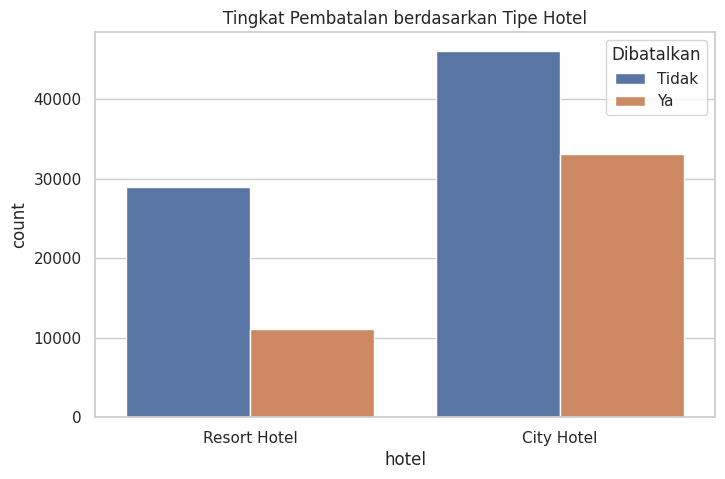

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='hotel', hue='is_canceled', data=df)
plt.title('Tingkat Pembatalan berdasarkan Tipe Hotel')
plt.legend(title='Dibatalkan', labels=['Tidak', 'Ya'])
plt.show()

## LEAD TIME & PEMBATALAN

Kita ingin tau "Apakah lead time mempengaruhi pembatalan?". Kita membandingkan variabel kategorikal (`is_canceled`) dengan variabel numerik (`lead_time`).
Plot terbaik untuk ini adalah `boxplot` (diagram kotak) yang menunjukkan distribusi (median, kuartil, outlier) dari lead time untuk grup **Dibatalkan** dan **Tidak Dibatalkan**

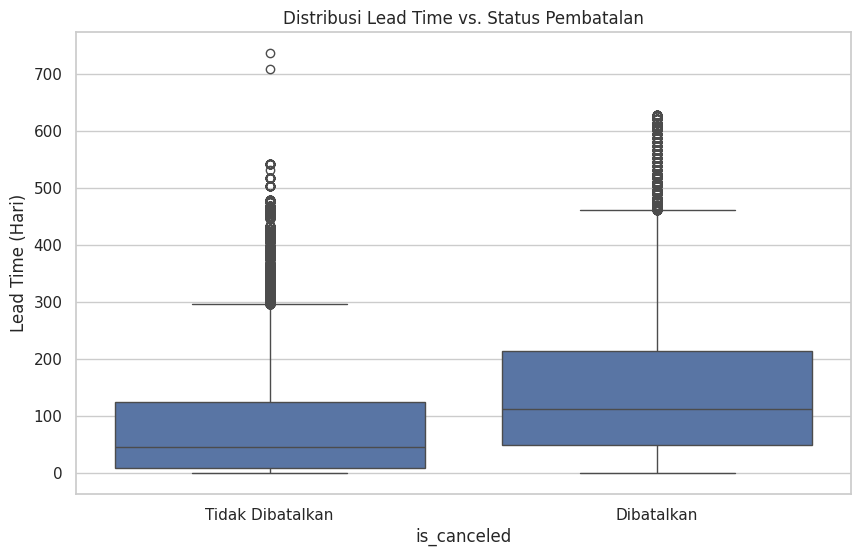

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title('Distribusi Lead Time vs. Status Pembatalan')
plt.xticks([0, 1], ['Tidak Dibatalkan', 'Dibatalkan'])
plt.ylabel('Lead Time (Hari)')
plt.show()

## TIPE PELANGGAN & PEMBATALAN

kita melihat hubungan antara dua variabel kategorikal `customer_type` dan `is_canceled`. Kita gunakan `countplot` dengan 'hue' lagi

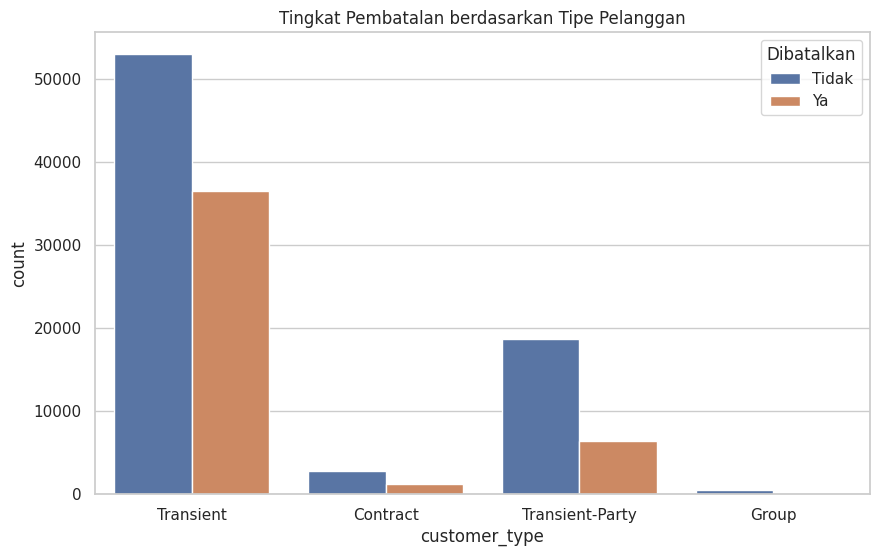

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='customer_type', hue='is_canceled', data=df)
plt.title('Tingkat Pembatalan berdasarkan Tipe Pelanggan')
plt.legend(title='Dibatalkan', labels=['Tidak', 'Ya'])
plt.show()

## ADR PER BULAN (TREN HARGA)

Kita ingin melihat tren harga / ADR (Average Daily Rate) sepanjang tahun, dan membandingkannya antara City Hotel vs Resort Hotel
`lineplot` (plot garis) sangat cocok untuk data time-series/urutan
X = Bulan (sudah diurutkan), Y = ADR (harga), hue = Tipe Hotel
`sort=False` penting agar tidak diurutkan alfabetis

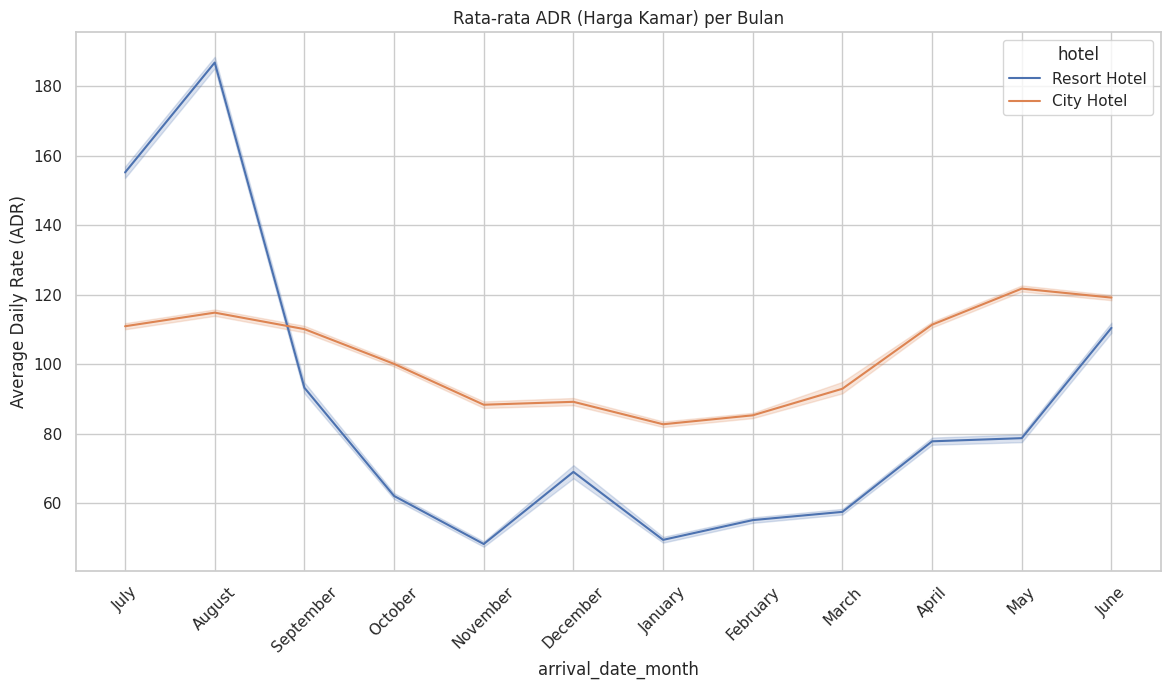

In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data=df,
             sort=False)
plt.title('Rata-rata ADR (Harga Kamar) per Bulan')
plt.xticks(rotation=45)
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

## HEATMAP KORELASI

Heatmap korelasi adalah cara cepat untuk melihat hubungan *linier* antar semua variabel *numerik*
1. `select_dtypes(include=[np.number])` : Memilih hanya kolom angka
2. `.corr()` : Menghitung matriks korelasi (nilai -1 s.d. 1)
3. `sns.heatmap()` : Memvisualisasikan matriks ini
`annot=True` : Menampilkan angka korelasi di setiap kotak
`cmap='coolwarm'` : Skema warna (Biru = negatif, Merah = positif)

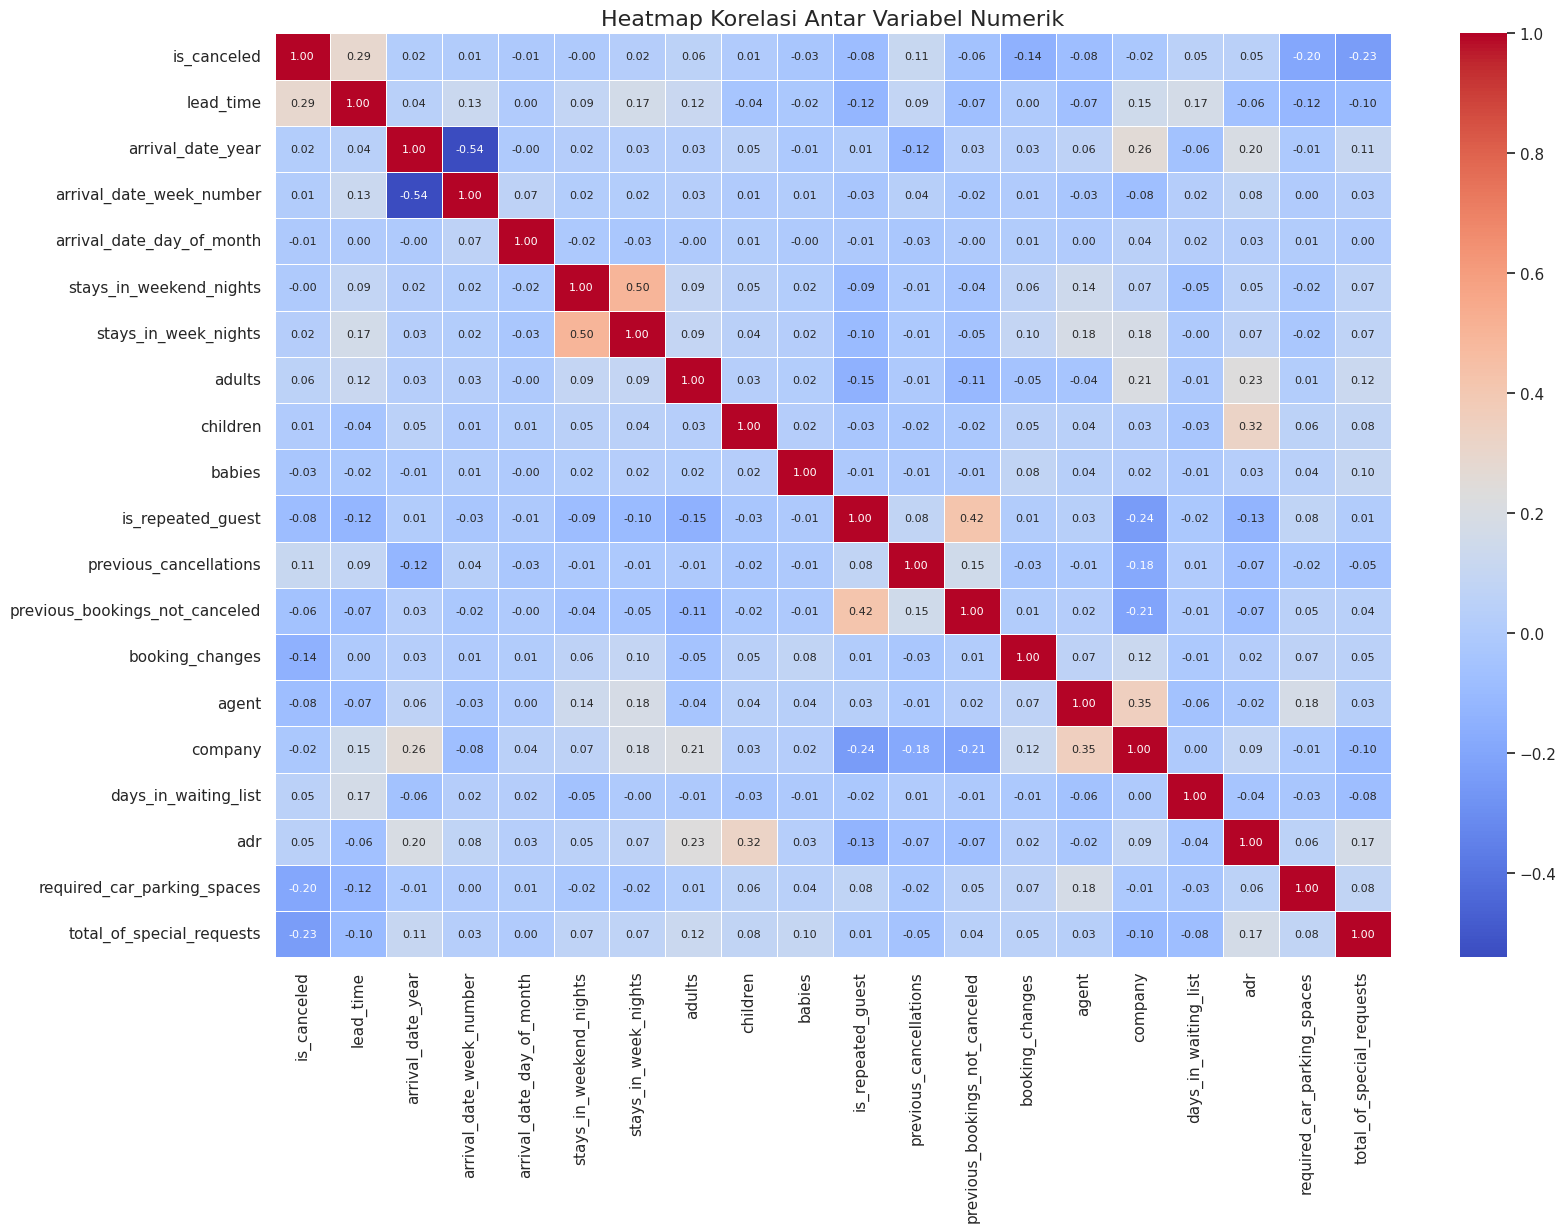

In [29]:
plt.figure(figsize=(18, 12))

# Memilih hanya kolom numerik untuk korelasi
numerical_cols = df.select_dtypes(include=[np.number])
corr_matrix = numerical_cols.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 8})
plt.title('Heatmap Korelasi Antar Variabel Numerik', fontsize=16)
plt.show()